In [2]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt 

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/sleep75.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [37]:
data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [40]:

data[ pd.isnull(data['exper'])].head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq


In [41]:
data['exper'].unique() 

array([14, 11, 21, 12, 44, 23, 17, 28,  9, 29,  1,  2, 37, 15,  5, 35, 22,
       10, 18, 41,  8,  6, 16, 31, 39, 19, 13,  4,  7, 36, 20, 33, 32, 26,
       48, 25, 27, 40, 38, 30, 42, 34, 45,  3, 24, 43, 46, 52,  0, 47, 55,
       54, 49], dtype=int64)

In [42]:
data = data.fillna(-1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   706 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:

data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [52]:
X = data [['exper', 'educ','age']]
X = pd.get_dummies (X, drop_first=True)
print()
X.head()

,exper,educ,age
0,14,12,32
1,11,14,31
2,21,17,44
3,12,12,30
4,44,14,64


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
le.fit( data['age'])

LabelEncoder()

In [55]:
le.classes_

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65], dtype=int64)

In [57]:

le.inverse_transform([1, 0, 1])

array([24, 23, 24], dtype=int64)

In [58]:
X

,exper,educ,age
0,14,12,32
1,11,14,31
2,21,17,44
3,12,12,30
4,44,14,64
...,...,...,...
701,27,12,45
702,18,10,34
703,19,12,37
704,31,17,54


In [60]:
y = (data['south']>0).astype('int32')
y.head()

0    0
1    1
2    0
3    0
4    0
Name: south, dtype: int32

<Axes: >

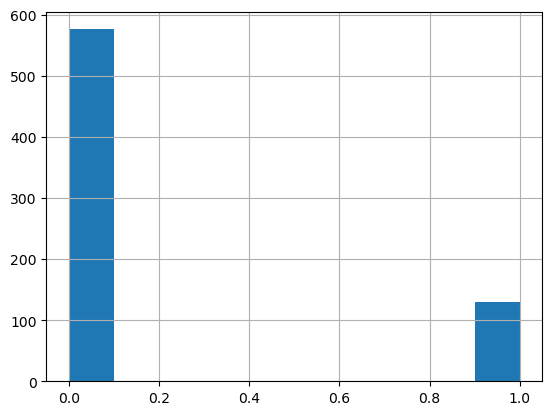

In [61]:
y.hist()

In [62]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [63]:
model = LogisticRegression()

In [64]:
y

0      0
1      1
2      0
3      0
4      0
      ..
701    0
702    0
703    0
704    1
705    1
Name: south, Length: 706, dtype: int32

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train

,exper,educ,age
155,4,16,26
210,10,13,29
260,5,12,23
424,15,16,37
539,10,12,28
...,...,...,...
71,8,9,23
106,22,11,39
270,40,12,58
435,9,12,27


In [67]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [68]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:

model.predict_proba(X_test)

array([[0.81660452, 0.18339548],
       [0.834454  , 0.165546  ],
       [0.81709888, 0.18290112],
       [0.82124704, 0.17875296],
       [0.82739268, 0.17260732],
       [0.80387853, 0.19612147],
       [0.84144449, 0.15855551],
       [0.80387853, 0.19612147],
       [0.81356338, 0.18643662],
       [0.84832774, 0.15167226],
       [0.85202756, 0.14797244],
       [0.80264156, 0.19735844],
       [0.82287534, 0.17712466],
       [0.80264156, 0.19735844],
       [0.8147477 , 0.1852523 ],
       [0.7795788 , 0.2204212 ],
       [0.85633857, 0.14366143],
       [0.80876776, 0.19123224],
       [0.80546423, 0.19453577],
       [0.83767238, 0.16232762],
       [0.84917612, 0.15082388],
       [0.78754284, 0.21245716],
       [0.85202756, 0.14797244],
       [0.81356338, 0.18643662],
       [0.81117725, 0.18882275],
       [0.81356338, 0.18643662],
       [0.85017588, 0.14982412],
       [0.86268075, 0.13731925],
       [0.77880063, 0.22119937],
       [0.8240133 , 0.1759867 ],
       [0.

In [71]:
model.score(X_train, y_train) 

0.8226950354609929

In [72]:
from sklearn.metrics import f1_score

In [73]:
f1_score(y_test, model.predict(X_test))

0.0

In [74]:
f1_score(y_train, model.predict(X_train))

0.0

In [75]:
model.score(X_test,y_test)

0.7887323943661971